# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib widget 

dados = pd.read_csv ('SINASC_RO_2019.csv')




####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

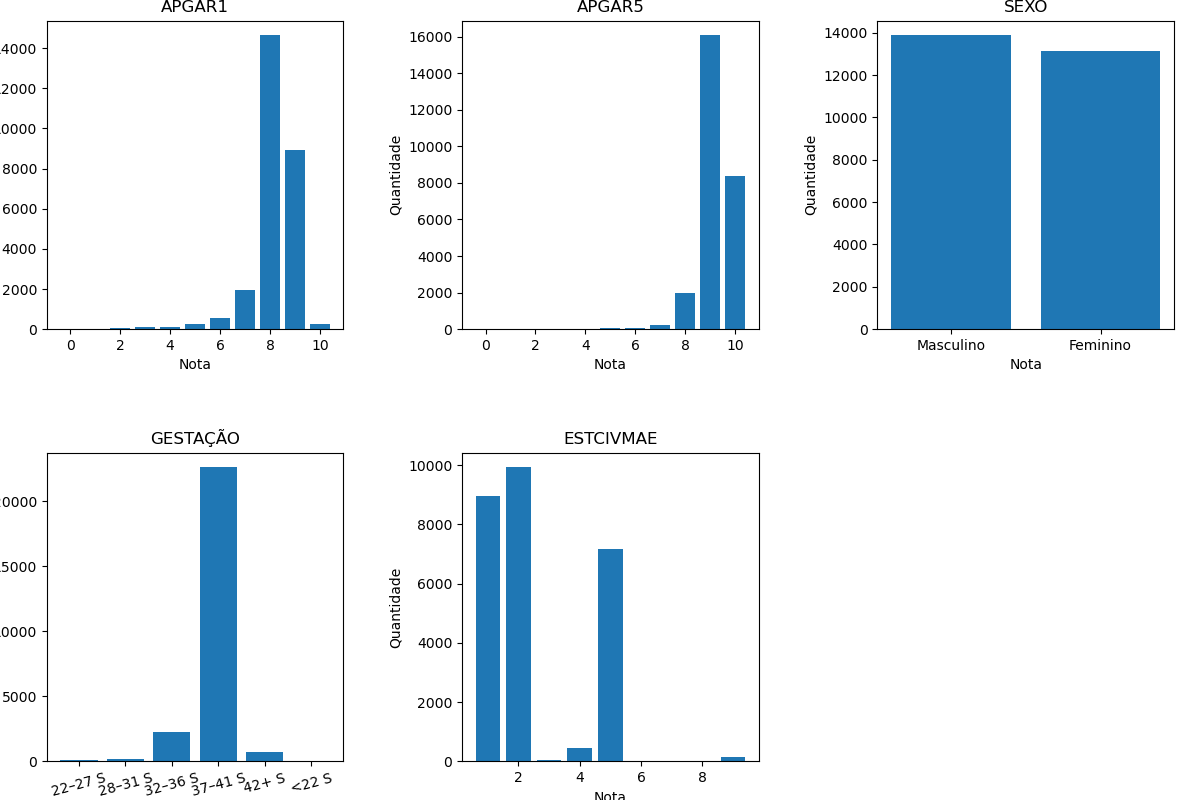

In [85]:
plt.close('all')

fig, ax = plt.subplots(2, 3, figsize=(12,8))
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.4)





#VARIAVEIS
#MAPA DE GESTACAO PARA AJUSTAR OS NOMES 
mapa_gestacao = {
    '37 a 41 semanas': '37–41 S',
    '32 a 36 semanas': '32–36 S',
    '42 semanas e mais': '42+ S',
    '28 a 31 semanas': '28–31 S',
    '22 a 27 semanas': '22–27 S',
    'Menos de 22 semanas': '<22 S'
}

contagem_apgar1 = dados['APGAR1'].value_counts()
contagem_apgar5 = dados['APGAR5'].value_counts()
contagem_sexo = dados['SEXO'].value_counts()
contagem_gestacao= dados['GESTACAO'].value_counts().sort_index()
contagem_estcivmae = dados ['ESTCIVMAE'].value_counts()
contagem_gestacao.index = contagem_gestacao.index.map(mapa_gestacao)



#GRAFICO 1
ax[0,0].bar(
    contagem_apgar1.index,
    contagem_apgar1.values
)

ax[0,0].set_title('APGAR1')
ax[0,0].set_xlabel('Nota')
ax[0,0].set_ylabel('Quantidade')

#GRAFICO 2
ax[0,1].bar(
    contagem_apgar5.index,
    contagem_apgar5.values
)

ax[0,1].set_title('APGAR5')
ax[0,1].set_xlabel('Nota')
ax[0,1].set_ylabel('Quantidade')

#GRAFICO 3

ax[0,2].bar(
    contagem_sexo.index,
    contagem_sexo.values
)

ax[0,2].set_title('SEXO')
ax[0,2].set_xlabel('Nota')
ax[0,2].set_ylabel('Quantidade')

#GRAFICO 4




ax[1,0].bar(
    contagem_gestacao.index,
    contagem_gestacao.values
)

ax[1,0].set_title('GESTAÇÃO')
ax[1,0].set_xlabel('Nota')
ax[1,0].set_ylabel('Quantidade')

ax[1,0].tick_params(axis='x', rotation=15)





#GRAFICO 5

ax[1,1].bar(
    contagem_estcivmae.index,
    contagem_estcivmae.values
)

ax[1,1].set_title('ESTCIVMAE')
ax[1,1].set_xlabel('Nota')
ax[1,1].set_ylabel('Quantidade')

ax[1,2].axis('off')


plt.show()



#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

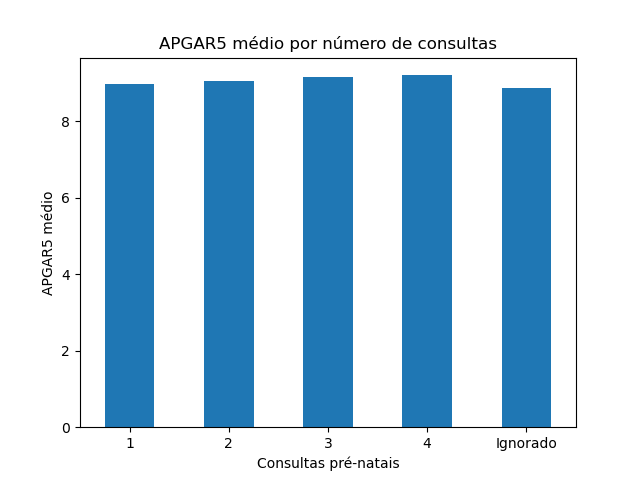

In [92]:
plt.close('all')
media_apgar5 = dados.groupby('CONSULTAS')['APGAR5'].mean()

media_apgar5.index = media_apgar5.index.map(
    lambda x: 'Ignorado' if x == 9 else str(x)
)

media_apgar5.plot(kind='bar')
plt.xlabel('Consultas pré-natais')
plt.ylabel('APGAR5 médio')
plt.title('APGAR5 médio por número de consultas')

plt.xticks(rotation=0)


plt.show()



####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

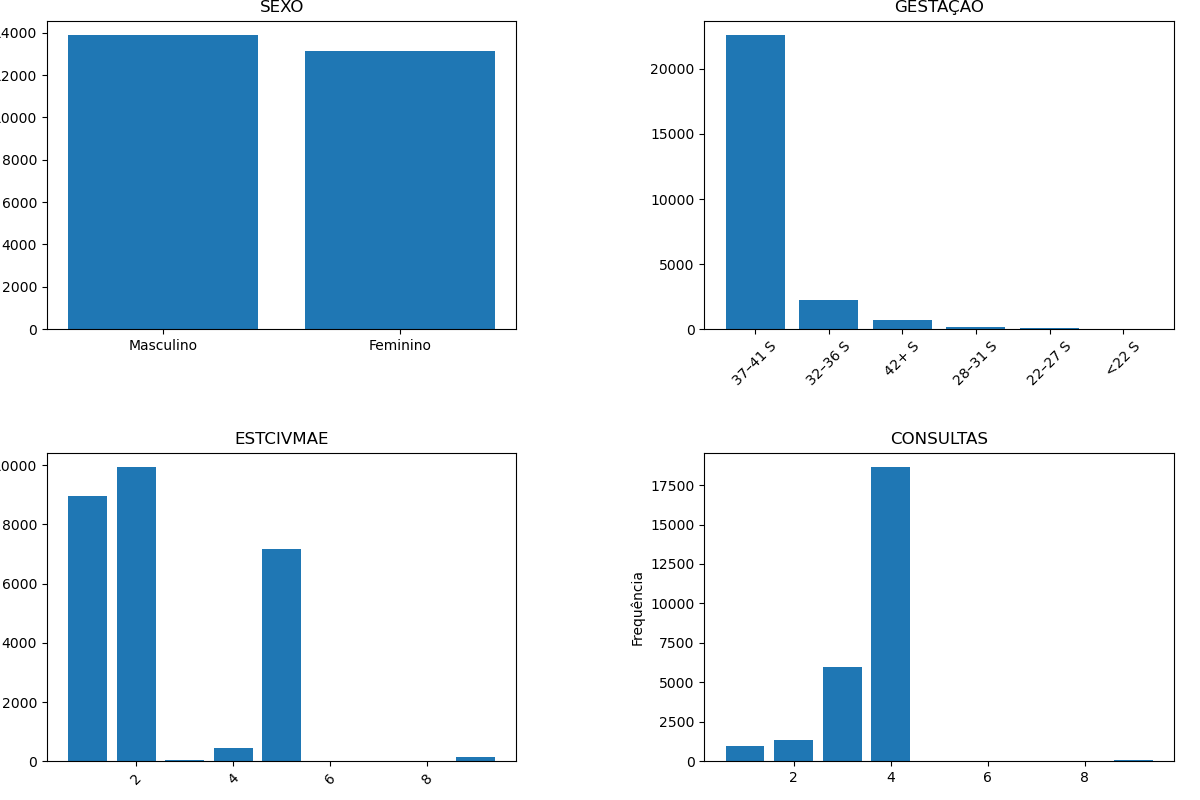

In [99]:
plt.close('all')

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Contagens
cont_sexo = dados['SEXO'].value_counts()

#Renomena
cont_gestacao = dados['GESTACAO'].value_counts()
cont_gestacao.index = cont_gestacao.index.map(
    lambda x: mapa_gestacao.get(x, x)
)

cont_estcivmae = dados['ESTCIVMAE'].value_counts()
cont_consultas = dados['CONSULTAS'].value_counts()


# Gráfico 1 — SEXO
ax[0,0].bar(cont_sexo.index, cont_sexo.values)
ax[0,0].set_title('SEXO')
ax[0,0].set_ylabel('Frequência')

# Gráfico 2 — GESTAÇÃO
ax[0,1].bar(cont_gestacao.index, cont_gestacao.values)
ax[0,1].set_title('GESTAÇÃO')
ax[0,1].tick_params(axis='x', rotation=45)

# Gráfico 3 — ESTCIVMAE
ax[1,0].bar(cont_estcivmae.index, cont_estcivmae.values)
ax[1,0].set_title('ESTCIVMAE')
ax[1,0].tick_params(axis='x', rotation=45)

# Gráfico 4 — CONSULTAS
ax[1,1].bar(cont_consultas.index, cont_consultas.values)
ax[1,1].set_title('CONSULTAS')
ax[1,1].set_ylabel('Frequência')

plt.show()
